# Distributed Computing with Dask: Step-by-step Exercise

Mahdi Farnaghi and Mahdi Khodadadzadeh

October 2024


**Objective: Explore distributed computing concepts using Dask for Exploratory Data Analysis (EDA).**

## Dataset

### Description 

In this exercise, we will be using the **Iris dataset**, one of the most well-known datasets in data science. The Iris dataset contains 150 samples from three species of Iris flowers: *Iris setosa*, *Iris virginica*, and *Iris versicolor*. Each sample has four features:

1. **Sepal length** (in cm)
2. **Sepal width** (in cm)
3. **Petal length** (in cm)
4. **Petal width** (in cm)

These features describe the physical characteristics of the flowers, which are used to classify the species. The dataset is widely used for classification tasks and exploratory data analysis (EDA).

---

### Dataset Columns:

- **sepal length**: Length of the sepal (in cm).
- **sepal width**: Width of the sepal (in cm).
- **petal length**: Length of the petal (in cm).
- **petal width**: Width of the petal (in cm).
- **species**: The species of the Iris flower (*Iris setosa*, *Iris virginica*, or *Iris versicolor*).

---

We will use this dataset to explore how Dask can be applied to distributed computing tasks for data analysis.

---

## Installation

In [9]:
!pip install -q "dask[distributed]" --upgrade 
!pip install -q dask[dataframe]
!pip install -q scipy

In [1]:
import dask.dataframe as dd
import os

## Step 1: Setting up the Dask Client

Task: Initialize a Dask Client to enable parallel and distributed computing.

In [2]:
from dask.distributed import Client
client = Client()

## Step 2: Load the dataset using Dask

Task: Load the Iris dataset using `dask.read_csv`.

Instruction: Use Dask's `read_csv` to load the Iris dataset. This is similar to how you use `pandas.read_csv`. Print the first 5 rows of the dataset.

In [117]:
data =dd.read_csv("EDA_iris.csv", names =["Sepal length", "Sepal Width", "Petal legth", "Petal Width", "species"])
data.head()

,Sepal length,Sepal Width,Petal legth,Petal Width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: Set the Index

Task: Set the species as the index for the dataframe.

Instruction: Change the index of the dataframe to 'species' and check how the dataset looks after the change.

In [118]:
data=data.set_index("species")
data.head()


,Sepal length,Sepal Width,Petal legth,Petal Width
species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,5.2,3.5,1.5,0.2
Iris-setosa,5.2,3.4,1.4,0.2
Iris-setosa,4.7,3.2,1.6,0.2
Iris-setosa,4.8,3.1,1.6,0.2


## Step 6: Getting Data Information

Task: Retrieve information about the dataframe's columns and types.

Instruction: Use .info() to explore the dataframe's structure.

In [119]:
data.info()

<class 'dask_expr.DataFrame'>
Columns: 4 entries, Sepal length to Petal Width
dtypes: float64(4)

Task: Compute descriptive statistics for the dataset.

Instruction: Use .describe() to calculate statistics for each column and ensure that you trigger computation with .compute().

In [6]:
x= data.describe()
x.compute()

,Sepal length,Sepal Width,Petal legth,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 4: Slicing the Dataset

Task: Perform slicing on the dataframe to select specific rows.

Instruction: Select a few rows from the dataframe and compute them using Dask's parallel computation.

In [14]:
#I tried to slice the dataset using the iloc but apparently the dask does not allow that.

# sliced_data = data.iloc[0:9,:]
# sliced_data.compute()

#To side a dataframe loaded in dask, since the dataframes is stored in the partitions,
# first we need to tell which partition and then we can slice the rowsThe below implementation selects the first 10 rows.

sliced_data=data.partitions[0]
sliced_data=sliced_data.compute()
sliced_data=sliced_data.iloc[0:10]
sliced_data


,Sepal length,Sepal Width,Petal legth,Petal Width
species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-setosa,4.9,3.0,1.4,0.2
Iris-setosa,4.7,3.2,1.3,0.2
Iris-setosa,4.6,3.1,1.5,0.2
Iris-setosa,5.0,3.6,1.4,0.2
Iris-setosa,5.4,3.9,1.7,0.4
Iris-setosa,4.6,3.4,1.4,0.3
Iris-setosa,5.0,3.4,1.5,0.2
Iris-setosa,4.4,2.9,1.4,0.2


## Step 5: Mean, Quantiles, and Variance

Task: Compute the mean, quantiles, and variance of the dataset.

Instruction: Calculate the mean, quantiles, and variance of the dataset.

In [15]:
#Calculating the mean and quantiles. 
x = data.describe()
x.compute()

,Sepal length,Sepal Width,Petal legth,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
#Calculating the variance

x=data.var()
var= x.compute()
print(f"The variance of all the columns are:\n{var}")

The variance of all the columns are:
Sepal length    0.685694
Sepal Width     0.188004
Petal legth     3.113179
Petal Width     0.582414
dtype: float64


## Step 6: Data Visualization

Task: Visualize the distribution of columns using histograms and density plots.

Instruction: Plot the histogram and kernel density estimate (KDE) for the 'sepal length' column.

<Axes: ylabel='Density'>

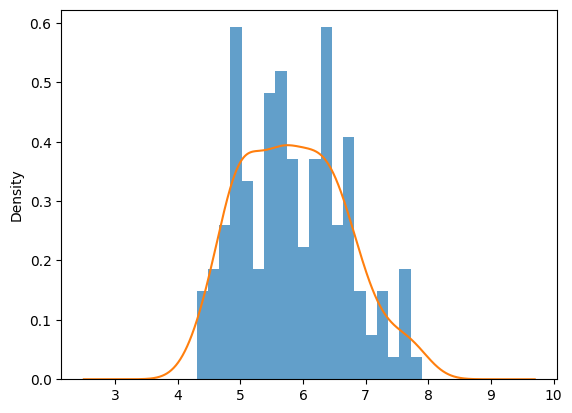

In [50]:
#Dask dataframe does not directly allow to compute the histogram using the pd.hist() because it does not have anything stored in the memoery
#Therefore, we need to first compute the column using the .compute() method

col = data['Sepal length']
sep_len=col.compute()


#Plotting the histogram using the pandas inbuilt functionality. To plot the KDE, we need to normalize it hence density=True
ax = sep_len.plot(kind='hist', bins=20, density=True, alpha=0.7, label='Histogram')

# Plotting the KDE on the same axis
sep_len.plot(kind='kde', ax=ax, label='KDE')

## Step 7: Pie and Bar Charts

Task: Create a pie chart and bar chart based on species count.

Instruction: Visualize the species distribution using a pie chart and a bar chart.

<Axes: ylabel='count'>

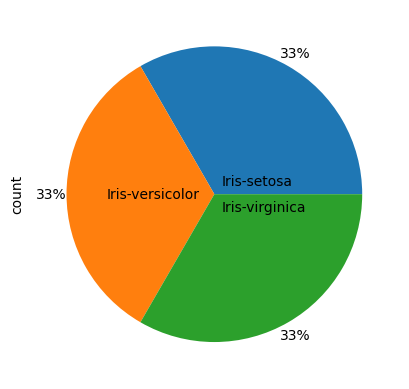

In [96]:

col = data.index
species=col.compute()
species.value_counts(dropna=True).plot(kind="pie", autopct='%1.0f%%', subplots=False, labeldistance=0.1, pctdistance=1.1)


<Axes: xlabel='species'>

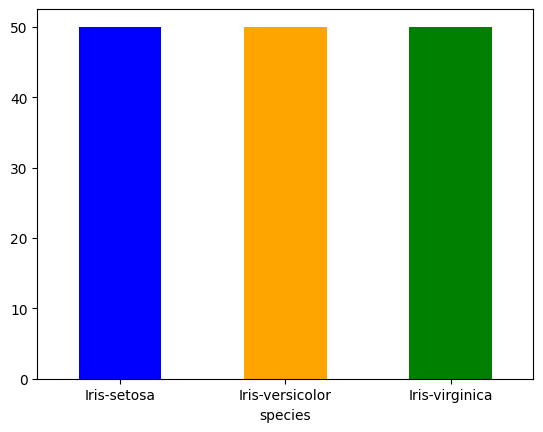

In [97]:
species.value_counts(dropna=True).plot(
    kind="bar", 
    color=['blue', 'orange', 'green'],
    rot=0
)

## Step 8: Covariance and Correlation

Task: Compute the covariance and correlation of the dataset.

Instruction: Calculate and display the covariance and correlation between columns.

In [124]:
import warnings

#Suppress all warnings
# warnings.filterwarnings("ignore")


cov=data.cov().compute()
corr= data.corr().compute()

print(f"The covariance of all the columns are:\n{cov}")
print(f"The correlation of all the columns are:\n{corr}")

The covariance of all the columns are:
              Sepal length  Sepal Width  Petal legth  Petal Width
Sepal length      0.685694    -0.039268     1.273682     0.516904
Sepal Width      -0.039268     0.188004    -0.321713    -0.117981
Petal legth       1.273682    -0.321713     3.113179     1.296387
Petal Width       0.516904    -0.117981     1.296387     0.582414
The correlation of all the columns are:
              Sepal length  Sepal Width  Petal legth  Petal Width
Sepal length      1.000000    -0.109369     0.871754     0.817954
Sepal Width      -0.109369     1.000000    -0.420516    -0.356544
Petal legth       0.871754    -0.420516     1.000000     0.962757
Petal Width       0.817954    -0.356544     0.962757     1.000000


## Step 8: Boxplot and Scatterplot

Task: Create a boxplot and scatterplot of the dataset.

Instruction: Generate a boxplot and scatterplot to explore the data distribution.

<Axes: xlabel='Petal legth', ylabel='Petal Width'>

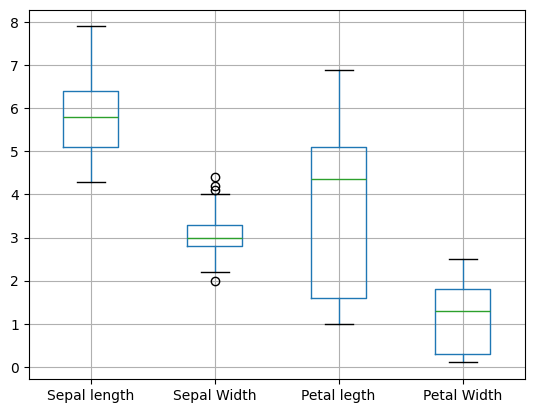

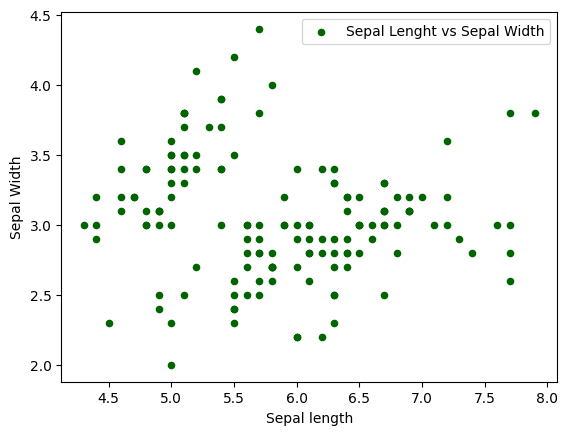

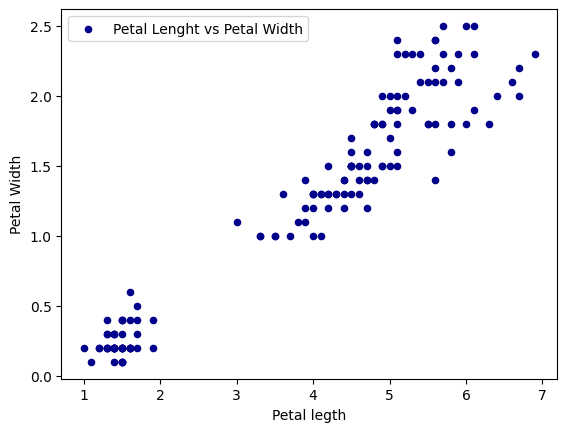

In [142]:
computed_data= data.compute()
computed_data.boxplot()
computed_data.plot(kind = 'scatter', x='Sepal length', y ='Sepal Width', color = 'DarkGreen', label= 'Sepal Lenght vs Sepal Width')
computed_data.plot(kind = 'scatter', x='Petal legth', y ='Petal Width', color = 'DarkBlue', label= 'Petal Lenght vs Petal Width')

## Step 9: Advanced Plots (3D and Hexbin)

Task: Create advanced visualizations such as a 3D plot and hexbin plot.

Instruction: Create a 3D scatter plot and a hexbin plot to visualize the relationship between petal length and width.

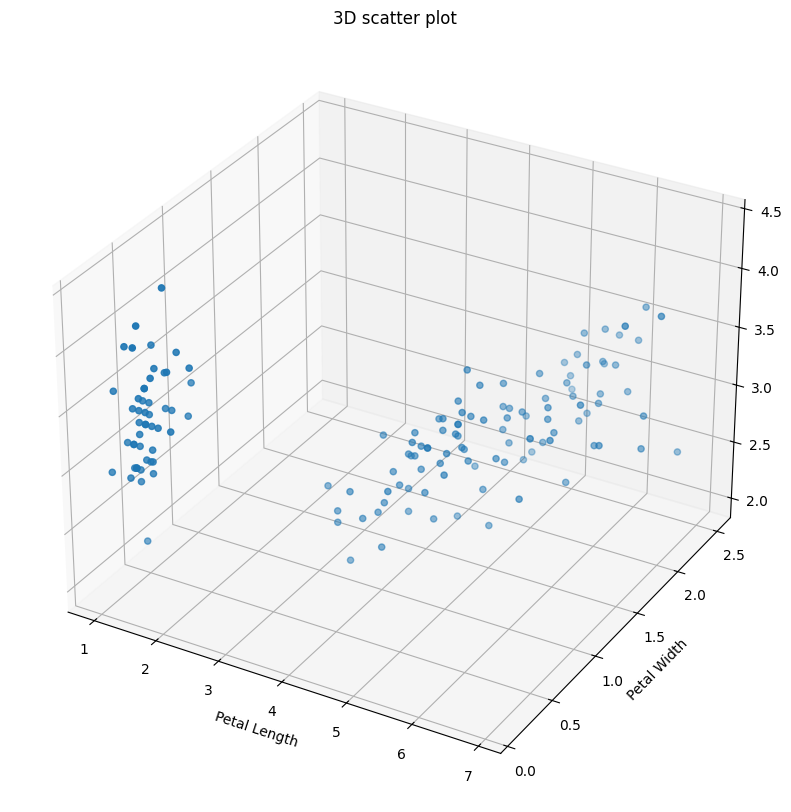

<Axes: xlabel='Petal legth', ylabel='Petal Width'>

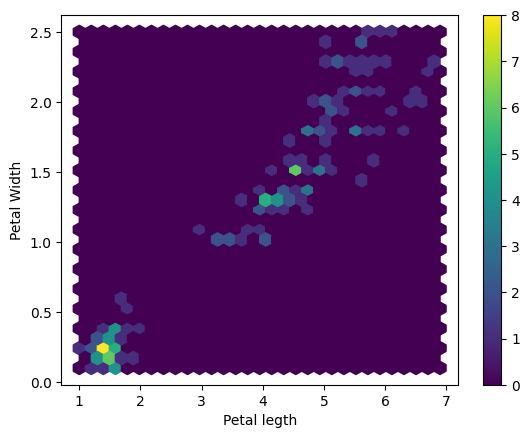

In [158]:

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(computed_data['Petal legth'], computed_data['Petal Width'], computed_data['Sepal Width'])

plt.title("3D scatter plot")
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
plt.show()

computed_data.plot.hexbin(x='Petal legth', y='Petal Width', gridsize=30, cmap="viridis")



## Final Step: Closing the Dask Client

Task: Properly close the Dask Client when done.

Instruction: Always remember to close the Dask Client when you're finished with the tasks.

In [159]:
client.close()